# An example of using cstools 
### last update: 2023-10-16

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import cstools

demo_dir = "./demo/input_file/zigzag"

ob_file = f"{demo_dir}/observation.shp"
cl_file = f"{demo_dir}/centerline.shp"
bd_file = f"{demo_dir}/BoundaryPolygon.shp"

reach = cstools.RiverReach(
    observation_file = ob_file,
    centerline_file = cl_file,
    boundary_file = bd_file
)


### Smooth centerline
The centerline is smoothed by default setting while initializing files.

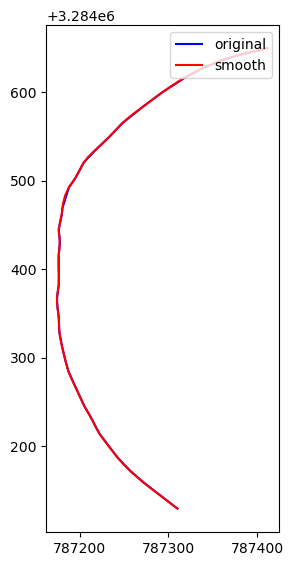

In [2]:
cl_gdf = gpd.read_file(cl_file)
fig, ax = plt.subplots(figsize=(3,9))
cl_gdf.plot(ax=ax, color='b', label='original')
reach.cl_gdf.plot(ax=ax, color='r', label='smooth')
plt.legend()
plt.show()

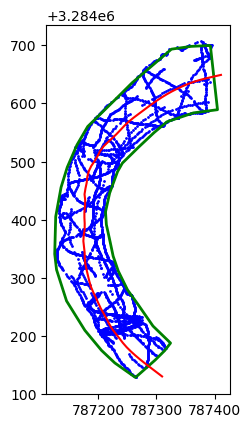

In [ ]:
fig, ax = plt.subplots()
reach.ob_gdf.plot(ax=ax, color='b', markersize=1)
reach.cl_gdf.plot(ax=ax, color='r')
reach.bd_gdf.plot(ax=ax, edgecolor='g', linewidth=2, facecolor='none')
plt.show()

Before concerting curvilinear coordinate

In [12]:
reach.ob_gdf.head()

,FID,x,y,z,geometry,S,N
0,0,787391.234355,3.284636e+06,5.677,POINT Z (787391.234 3284636.098 5.677),23.986055,-8.232452
1,1,787386.420659,3.284635e+06,5.655,POINT Z (787386.421 3284634.865 5.655),28.954570,-8.309062
2,2,787381.609779,3.284634e+06,5.702,POINT Z (787381.610 3284633.521 5.702),34.161576,-8.397400
3,3,787354.311027,3.284621e+06,5.745,POINT Z (787354.311 3284621.060 5.745),65.424325,-11.523713
4,4,787350.212211,3.284618e+06,5.960,POINT Z (787350.212 3284618.403 5.960),70.232750,-12.383232


After concerting curvilinear coordinate

In [ ]:
reach.convert_sn_coord_for_layer()
reach.ob_gdf.head()

,FID,x,y,z,geometry,S,N
0,0,787391.234355,3.284636e+06,5.677,POINT Z (787391.234 3284636.098 5.677),23.986055,-8.232452
1,1,787386.420659,3.284635e+06,5.655,POINT Z (787386.421 3284634.865 5.655),28.954570,-8.309062
2,2,787381.609779,3.284634e+06,5.702,POINT Z (787381.610 3284633.521 5.702),34.161576,-8.397400
3,3,787354.311027,3.284621e+06,5.745,POINT Z (787354.311 3284621.060 5.745),65.424325,-11.523713
4,4,787350.212211,3.284618e+06,5.960,POINT Z (787350.212 3284618.403 5.960),70.232750,-12.383232


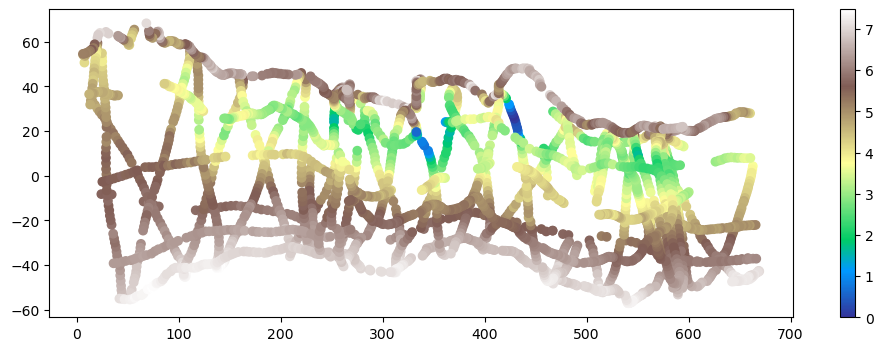

In [ ]:
plt.figure(figsize=(12,4))
plt.scatter(reach.ob_gdf['S'], reach.ob_gdf['N'], c=reach.ob_gdf['z'], cmap='terrain')
plt.colorbar()
plt.show()

## Generate a mesh by points

1. with default settings

In [7]:
output_dir = './demo/output'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


mesh_file1 = f"{output_dir}/mesh1.shp"
cst = cstools.CrossSectionTools(reach)

mesh_df = cst.PointToMesh(output_dir=output_dir, output_point_file=mesh_file1)
mesh_df.head()

Determine positions of cross-sections by the histogram of observation points...
Creating cross-section lines...
Projecting observation points to cross-sections lines...
Generating points on given corss-sections...
Interpolating cross-sections...


,XS_id,S,N,z,vertex_id,geometry
0,0,25.526209,-56.618651,6.161841,0,POINT Z (787401.019 3284588.687 6.162)
1,0,25.526209,-49.953015,6.161841,1,POINT Z (787399.465 3284595.169 6.162)
2,0,25.526209,-43.287380,6.161841,2,POINT Z (787397.911 3284601.651 6.162)
3,0,25.526209,-36.621744,6.161841,3,POINT Z (787396.356 3284608.133 6.162)
4,0,25.526209,-29.956108,5.979585,4,POINT Z (787394.802 3284614.614 5.980)


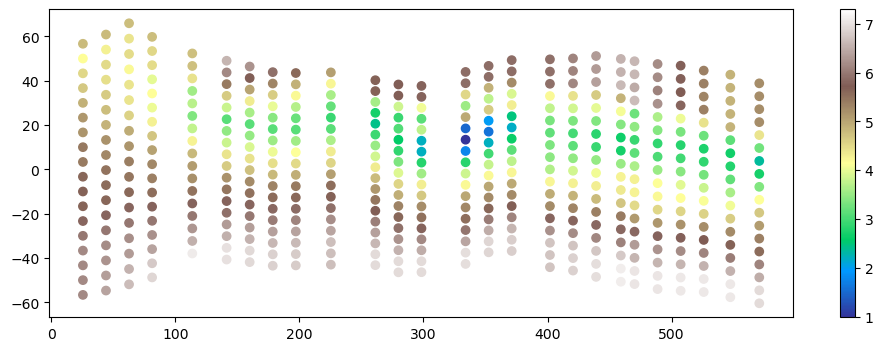

In [8]:
plt.figure(figsize=(12,4))
plt.scatter(mesh_df['S'], mesh_df['N'], c=mesh_df['z'], cmap='terrain')
plt.colorbar()
plt.show()

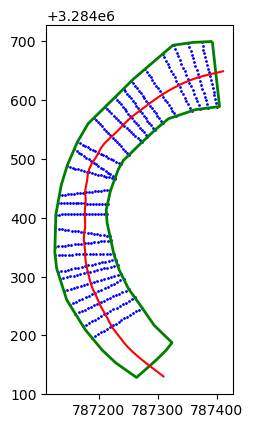

In [18]:
mesh_gdf1 = gpd.read_file(mesh_file1)
fig, ax = plt.subplots()
mesh_gdf1.plot(ax=ax, color='b', markersize=1)
reach.cl_gdf.plot(ax=ax, color='r')
reach.bd_gdf.plot(ax=ax, edgecolor='g', linewidth=2, facecolor='none')
plt.show()

2. Specified parameters

In [19]:

mesh_file2 = f"{output_dir}/mesh2.shp"
mesh_df = cst.PointToMesh(num_vertices = 41, space_min = 5, space_max=10, output_dir=output_dir, output_point_file=mesh_file2)
mesh_df.head()

Determine positions of cross-sections by the histogram of observation points...
Creating cross-section lines...
Projecting observation points to cross-sections lines...
Generating points on given corss-sections...
Interpolating cross-sections...


,XS_id,S,N,z,vertex_id,geometry
0,0,25.526209,-56.618651,6.08267,0,POINT Z (787401.019 3284588.687 6.083)
1,0,25.526209,-53.785756,6.08267,1,POINT Z (787400.358 3284591.442 6.083)
2,0,25.526209,-50.952861,6.08267,2,POINT Z (787399.698 3284594.196 6.083)
3,0,25.526209,-48.119965,6.08267,3,POINT Z (787399.037 3284596.951 6.083)
4,0,25.526209,-45.287070,6.08267,4,POINT Z (787398.377 3284599.706 6.083)


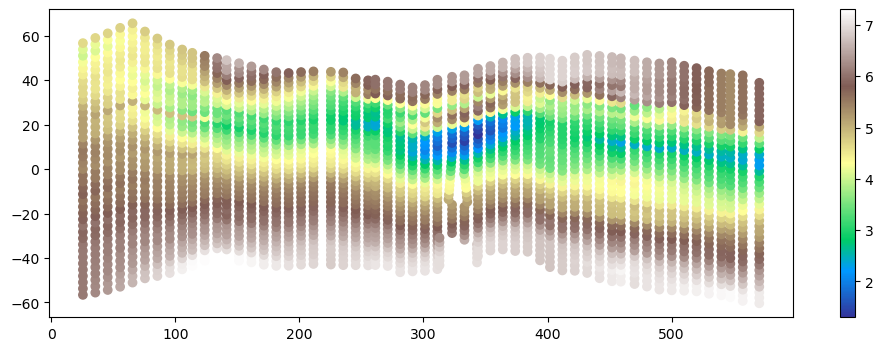

In [20]:
plt.figure(figsize=(12,4))
plt.scatter(mesh_df['S'], mesh_df['N'], c=mesh_df['z'], cmap='terrain')
plt.colorbar()
plt.show()

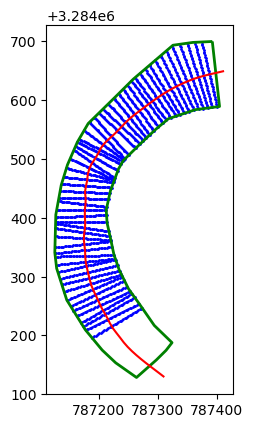

In [21]:
mesh_gdf2 = gpd.read_file(mesh_file2)
fig, ax = plt.subplots()
mesh_gdf2.plot(ax=ax, color='b', markersize=1)
reach.cl_gdf.plot(ax=ax, color='r')
reach.bd_gdf.plot(ax=ax, edgecolor='g', linewidth=2, facecolor='none')
plt.show()